In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 讀取train/test資料

In [2]:
train=pd.read_csv('./data/sales_train.csv')
test=pd.read_csv('./data/test.csv')

## 去處異常item_cnt_day/item_price

In [3]:
cnt=np.array(train["item_cnt_day"])
price=np.array(train['item_price'])

In [4]:
len(cnt)

2935849

{'boxes': [<matplotlib.lines.Line2D at 0x7fc31cac16d8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc31cad8128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc31cad8ef0>],
 'means': [<matplotlib.lines.Line2D at 0x7fc31cad8ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc31cad8828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc31cac19e8>,
  <matplotlib.lines.Line2D at 0x7fc31cac1d68>]}

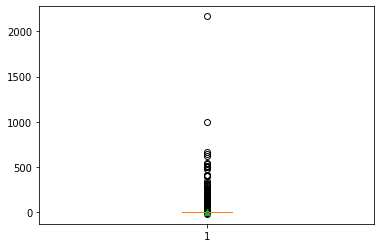

In [5]:
plt.boxplot(cnt,showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc31ca964a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc31c5f6e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc31c61ec50>],
 'means': [<matplotlib.lines.Line2D at 0x7fc31c61e908>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc31c61e588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc31c5f6748>,
  <matplotlib.lines.Line2D at 0x7fc31c5f6ac8>]}

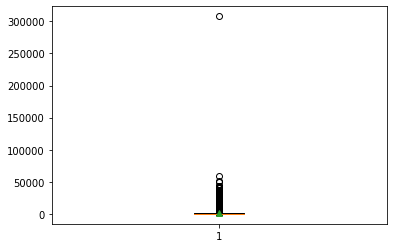

In [6]:
plt.boxplot(price,showmeans=True)

In [7]:
train = train[train.item_cnt_day<1000]
train = train[train.item_price<100000]

## 去除cnt/price 負值

In [8]:
train.loc[train.item_cnt_day < 0, "item_cnt_day"] = 0

In [9]:
train = train[train.item_price > 0].reset_index(drop = True)

## 相同shop處理

In [10]:
shops = pd.read_csv('./data/shops.csv')


In [11]:
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57

train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

train.loc[train.shop_id == 39, "shop_id"] = 40
test.loc[test.shop_id == 39, "shop_id"] = 40

## shop劃分為city和category

In [12]:
shops[shops.shop_id == 46]

,shop_name,shop_id
46,"Сергиев Посад ТЦ ""7Я""",46


In [13]:
shops.loc[ shops.shop_name == 'Сергиев Посад ТЦ "7Я"',"shop_name" ] = 'СергиевПосад ТЦ "7Я"'

In [14]:
shops["city"] = shops.shop_name.str.split(" ").map( lambda x: x[0] )
shops["category"] = shops.shop_name.str.split(" ").map( lambda x: x[1] )

In [15]:
shops.loc[shops.city == "!Якутск", "city"] = "Якутск"

In [16]:
shops.head()

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [17]:
shops.category.unique()

array(['Орджоникидзе,', 'ТЦ', 'ТРК', 'ТРЦ', '(Плехановская,', 'Торговля',
       'ул.', 'ЧС', '"Распродажа"', 'МТРЦ', 'Магазин', 'ТК', 'склад'],
      dtype=object)

In [18]:
# 新設立一個空清單，「shops」資料集中「category」欄位中的資料僅寫入出現頻率較高的資料(在此設為4)於新清單內
category = []
for cat in shops.category.unique():
    print(cat, len(shops[shops.category == cat]) )
    if len(shops[shops.category == cat]) > 3:
        category.append(cat)
# 將出現頻率較低者放入"etc"內
shops.category = shops.category.apply( lambda x: x if (x in category) else "etc" )

Орджоникидзе, 2
ТЦ 28
ТРК 5
ТРЦ 11
(Плехановская, 1
Торговля 1
ул. 2
ЧС 1
"Распродажа" 1
МТРЦ 1
Магазин 1
ТК 5
склад 1


In [19]:
#shops.head(5)

In [20]:
from sklearn.preprocessing import LabelEncoder
shops["shop_category"] = LabelEncoder().fit_transform( shops.category )
shops["shop_city"] = LabelEncoder().fit_transform( shops.city )
shops = shops[["shop_id", "shop_category", "shop_city"]]

In [21]:
shops.head()

,shop_id,shop_category,shop_city
0,0,0,29
1,1,4,29
2,2,4,0
3,3,2,1
4,4,4,2


## item_categories進行細分

In [22]:
cats = pd.read_csv('./data/item_categories.csv')

In [23]:
#cats.head()

In [24]:
cats["item_type"] = cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)

In [25]:
#cats.head()

In [26]:
category = []
for cat in cats.item_type.unique():
    print(cat, len(cats[cats.item_type == cat]))
    if len(cats[cats.item_type == cat]) > 3: 
        category.append( cat )

PC 1
Аксессуары 7
Билеты 1
Доставка 1
Игровые 8
Игры 14
Карты 5
Кино 5
Книги 13
Музыка 6
Подарки 12
Программы 6
Служебные 2
Чистые 2
Элементы 1


In [27]:
cats.item_type = cats.item_type.apply(lambda x: x if (x in category) else "etc")


In [28]:
#cats.head()

In [29]:
cats.item_type= LabelEncoder().fit_transform(cats.item_type)

In [30]:
#cats.head()

In [31]:
cats["split"] = cats.item_category_name.apply(lambda x: x.split("-"))
cats["subtype"] = cats.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [32]:
#cats.head(5)

In [33]:
cats["subtype_code"] = LabelEncoder().fit_transform( cats["subtype"] )
cats = cats[["item_category_id", "subtype_code", "item_type"]]
# 檢視「cats」資料集前5筆資料
cats.head(5)

,item_category_id,subtype_code,item_type
0,0,29,0
1,1,9,1
2,2,10,1
3,3,11,1
4,4,13,1


## 根據item_name進行細分

In [34]:
items = pd.read_csv('./data/items.csv')

In [35]:
#items.head()

In [36]:
items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
items["name"],items["name3"] = items.name2.str.split("]", 1).str
items["name"] = items.name.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()

items = items.fillna('0')
import re
def name_correction(x):
    x = x.lower()
    x = x.partition('[')[0]
    x = x.partition('(')[0]
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x)
    x = x.replace('  ', ' ')
    x = x.strip()
    return x
items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))
items.name= items.name.apply( lambda x: x[:] if x !="0" else "0")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [37]:
#len(items.name.unique())

In [38]:
items["type"] = items.name.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0] )
items.loc[(items.type == "x360") | (items.type == "xbox360") | (items.type == "xbox 360") ,"type"] = "xbox 360"
items.loc[ (items.type == 'pc' )| (items.type == 'pс') | (items.type == "pc"), "type" ] = "pc"
items.loc[ items.type == 'рs3' , "type"] = "ps3"
items.loc[ items.type == "", "type"] = "mac"

items.type = items.type.apply( lambda x: x.replace(" ", "") )

In [39]:
group_sum = items.groupby(["type"]).agg({"item_id":"count"})
group_sum = group_sum.reset_index()
#group_sum

In [40]:
# 新設立一個空清單，Dataframe「group_sum」中的資料寫入出現頻率較低的資料(在此設為40)於清單內
drop_cols = []
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)


In [41]:
#drop_cols

In [42]:
for i in drop_cols:
    items.name[items.type==i] = "etc"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
#len(items.name.unique())

In [44]:
items.drop(["item_name", "name1","name2","name3","type"],axis = 1, inplace= True)

In [45]:
items.name= LabelEncoder().fit_transform(items.name)
items.head()

,item_id,item_category_id,name
0,0,40,4
1,1,76,48
2,2,40,4
3,3,40,4
4,4,40,4


##Matrix 建立

In [46]:
from itertools import product
#用train製作Dataframe maxtrix
matrix = []
cols  = ["date_block_num", "shop_id", "item_id"]
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )

matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values( cols, inplace = True )

matrix

,date_block_num,shop_id,item_id
114910,0,2,19
117150,0,2,27
120623,0,2,28
118316,0,2,29
114602,0,2,32
...,...,...,...
10697061,33,59,22162
10697251,33,59,22163
10697917,33,59,22164
10699443,33,59,22166


In [47]:
#train加入新變數-revenue
#matrix加入新變數-item_cnt_month:每家店每個item每個月所賣的數量
train["revenue"] = train["item_cnt_day"] * train["item_price"]

group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)


test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)



matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
matrix.fillna( 0, inplace = True )



matrix = pd.merge( matrix, shops, on = ["shop_id"], how = "left" )
matrix = pd.merge(matrix, items, on = ["item_id"], how = "left")
matrix = pd.merge( matrix, cats, on = ["item_category_id"], how = "left" )
matrix["shop_city"] = matrix["shop_city"].astype(np.int8)
matrix["shop_category"] = matrix["shop_category"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["subtype_code"] = matrix["subtype_code"].astype(np.int8)

matrix["item_type"] = matrix["item_type"].astype(np.int8)

matrix

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name,subtype_code,item_type
0,0,2,19,0.0,4,0,40,4,4,5
1,0,2,27,1.0,4,0,19,60,10,3
2,0,2,28,0.0,4,0,30,77,55,3
3,0,2,29,0.0,4,0,23,90,16,3
4,0,2,32,0.0,4,0,40,4,4,5
...,...,...,...,...,...,...,...,...,...,...
11056272,34,45,18454,0.0,4,20,55,4,2,7
11056273,34,45,16188,0.0,4,20,64,4,42,8
11056274,34,45,15757,0.0,4,20,55,4,2,7
11056275,34,45,19648,0.0,4,20,40,4,4,5


##加入Lag Feature

In [48]:
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )

matrix.head()

group = matrix.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num"], how = "left")
matrix.date_avg_item_cnt = matrix["date_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1], ["date_avg_item_cnt"] )
matrix.drop( ["date_avg_item_cnt"], axis = 1, inplace = True )


group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix.date_item_avg_item_cnt = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3], ['date_item_avg_item_cnt'])
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)



group = matrix.groupby( ["date_block_num","shop_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_avg_item_cnt"] )
matrix.drop( ["date_shop_avg_item_cnt"], axis = 1, inplace = True )



group = matrix.groupby( ["date_block_num","shop_id","item_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_item_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id","item_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_item_avg_item_cnt"] )
matrix.drop( ["date_shop_item_avg_item_cnt"], axis = 1, inplace = True )



group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix.date_shop_subtype_avg_item_cnt = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_subtype_avg_item_cnt'])
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)



group = matrix.groupby(['date_block_num', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_city_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', "shop_city"], how='left')
matrix.date_city_avg_item_cnt = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_city_avg_item_cnt'])
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)



group = matrix.groupby(['date_block_num', 'item_id', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'shop_city'], how='left')
matrix.date_item_city_avg_item_cnt = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_item_city_avg_item_cnt'])
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)



group = train.groupby( ["item_id"] ).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge( group, on = ["item_id"], how = "left" )
matrix["item_avg_item_price"] = matrix.item_avg_item_price.astype(np.float16)


group = train.groupby( ["date_block_num","item_id"] ).agg( {"item_price": ["mean"]} )
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge(group, on = ["date_block_num","item_id"], how = "left")
matrix["date_item_avg_item_price"] = matrix.date_item_avg_item_price.astype(np.float16)
lags = [1, 2, 3]
matrix = lag_feature( matrix, lags, ["date_item_avg_item_price"] )
for i in lags:
    matrix["delta_price_lag_" + str(i) ] = (matrix["date_item_avg_item_price_lag_" + str(i)]- matrix["item_avg_item_price"] )/ matrix["item_avg_item_price"]


item_cnt_month
date_avg_item_cnt
date_item_avg_item_cnt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


date_shop_avg_item_cnt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


date_shop_item_avg_item_cnt
date_shop_subtype_avg_item_cnt
date_city_avg_item_cnt
date_item_city_avg_item_cnt
date_item_avg_item_price


In [49]:

def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

matrix["delta_price_lag"] = matrix.apply(select_trends, axis = 1)
matrix["delta_price_lag"] = matrix.delta_price_lag.astype( np.float16 )
matrix["delta_price_lag"].fillna( 0 ,inplace = True)

features_to_drop = ["item_avg_item_price", "date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_" + str(i) )
    features_to_drop.append("delta_price_lag_" + str(i) )
matrix.drop(features_to_drop, axis = 1, inplace = True)


group = train.groupby( ["date_block_num","shop_id"] ).agg({"revenue": ["sum"] })
group.columns = ["date_shop_revenue"]
group.reset_index(inplace = True)

matrix = matrix.merge( group , on = ["date_block_num", "shop_id"], how = "left" )
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(["shop_id"]).agg({ "date_block_num":["mean"] })
group.columns = ["shop_avg_revenue"]
group.reset_index(inplace = True )

matrix = matrix.merge( group, on = ["shop_id"], how = "left" )
matrix["shop_avg_revenue"] = matrix.shop_avg_revenue.astype(np.float32)
matrix["delta_revenue"] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix["delta_revenue"] = matrix["delta_revenue"]. astype(np.float32)

matrix = lag_feature(matrix, [1], ["delta_revenue"])
matrix["delta_revenue_lag_1"] = matrix["delta_revenue_lag_1"].astype(np.float32)
matrix.drop( ["date_shop_revenue", "shop_avg_revenue", "delta_revenue"] ,axis = 1, inplace = True)

matrix["month"] = matrix["date_block_num"] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix["days"] = matrix["month"].map(days).astype(np.int8)

matrix["item_shop_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id","shop_id"])["date_block_num"].transform('min')
matrix["item_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id"])["date_block_num"].transform('min')

matrix = matrix[matrix["date_block_num"] > 3]


delta_revenue


In [50]:
matrix.head(5).T

,1497465,1497466,1497467,1497468,1497469
date_block_num,4.000000,4.000000,4.0,4.000000,4.000000
shop_id,2.000000,2.000000,2.0,2.000000,2.000000
item_id,27.000000,28.000000,29.0,30.000000,31.000000
item_cnt_month,0.000000,0.000000,0.0,0.000000,0.000000
shop_category,4.000000,4.000000,4.0,4.000000,4.000000
shop_city,0.000000,0.000000,0.0,0.000000,0.000000
item_category_id,19.000000,30.000000,23.0,40.000000,37.000000
name,60.000000,77.000000,90.0,4.000000,4.000000
subtype_code,10.000000,55.000000,16.0,4.000000,1.000000
item_type,3.000000,3.000000,3.0,5.000000,5.000000
